In [1]:
%matplotlib inline

In [309]:
import skimage.data
import skimage.transform
import matplotlib.pyplot as plt
import sys

import PIL

import PIL.Image

import numpy as np

In [200]:
from skimage.viewer import ImageViewer

In [316]:
imgID = 24241

In [318]:
im = skimage.data.imread('/data/training_data/train/%s.jpg' % imgID)

(479, 363, 4)

In [320]:
pixelsx = im.shape[1]
pixelsy = im.shape[0]

yxRatio = (pixelsy/pixelsx)

if yxRatio < 1.0:
    num_y_samp = 102
    num_x_samp = np.int( 100 / yxRatio ) + 2
else:
    num_x_samp = 102
    num_y_samp = np.int( 100 * yxRatio) + 2

print( '%i,%i' % (num_x_samp, num_y_samp))

x_space = np.round(np.linspace(0, pixelsx-1, num_x_samp)).astype(int)
y_space = np.round(np.linspace(0, pixelsy-1, num_y_samp)).astype(int)

samp_im = np.take(im, x_space, axis=1)
samp_im = np.take(samp_im, y_space, axis=0)

#samp_im = skimage.transform.resize(im, [num_y_samp, num_x_samp])

102,133


In [321]:
temp = np.zeros([num_y_samp, num_x_samp, 3])
for ind in range(3):
    temp[:,:,ind] = samp_im
samp_im = temp

ValueError: could not broadcast input array from shape (133,102,4) into shape (133,102)

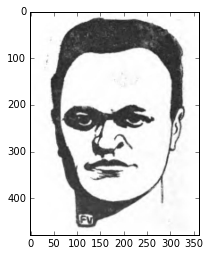

In [322]:
plt.imshow(im)

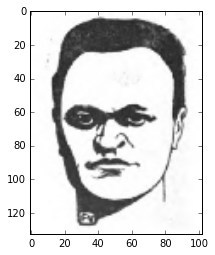

In [323]:
plt.imshow(samp_im)

In [306]:
hsvImage = skimage.color.rgb2hsv(samp_im)
h_angles = hsvImage[:,:,0] * 2.0 * np.pi

hsvImageMod = hsvImage.copy()
hsvImageMod[:,:,0] = h_angles

hsv_x_grad = np.abs(hsvImageMod[1:-1,0:num_x_samp-2,:] - hsvImageMod[1:-1,1:num_x_samp-1,:])
hsv_y_grad = np.abs(hsvImageMod[0:num_y_samp-2,1:-1,:] - hsvImageMod[1:num_y_samp-1,1:-1,:])
hsv_grad_mag = np.sqrt(np.power(hsv_x_grad,2) + np.power(hsv_y_grad,2))

In [303]:
hsvImage = skimage.color.rgb2hsv(samp_im)
h_angles = hsvImage[:,:,0] * 2.0 * np.pi

hsvImageMod = hsvImage.copy()
hsvImageMod[:,:,0] = h_angles

hsv_x_grad = np.zeros([num_y_samp-2, num_x_samp-2, 3])
hsv_y_grad = np.zeros([num_y_samp-2, num_x_samp-2, 3])

hsv_x_grad[:,:,0] = np.min(
        [ np.abs(hsvImageMod[1:-1,0:num_x_samp-2,0] - hsvImageMod[1:-1,1:num_x_samp-1,0]),
        2.0 * np.pi - np.abs( hsvImageMod[1:-1,0:num_x_samp-2,0] - hsvImageMod[1:-1,1:num_x_samp-1,0])
        ],
        axis = 0
      )

hsv_y_grad[:,:,0] = np.min(
        [ np.abs(hsvImageMod[0:num_y_samp-2,1:-1,0] - hsvImageMod[1:num_y_samp-1,1:-1,0]),
        2.0 * np.pi - np.abs( hsvImageMod[0:num_y_samp-2,1:-1,0] - hsvImageMod[1:num_y_samp-1,1:-1,0])
        ],
        axis = 0
      )

hsv_x_grad[:,:,1:3] = np.abs(hsvImageMod[1:-1,0:num_x_samp-2,1:3] - hsvImageMod[1:-1,1:num_x_samp-1,1:3])
hsv_y_grad[:,:,1:3] = np.abs(hsvImageMod[0:num_y_samp-2,1:-1,1:3] - hsvImageMod[1:num_y_samp-1,1:-1,1:3])

hsv_grad_mag = np.sqrt(np.power(hsv_x_grad,2) + np.power(hsv_y_grad,2))

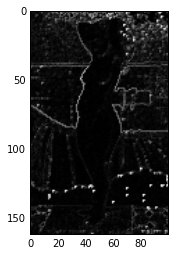

In [307]:
plt.imshow(hsv_grad_mag[:,:,0],cmap='Greys_r')

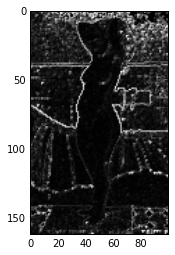

In [305]:
plt.imshow(hsv_grad_mag[:,:,0],cmap='Greys_r')

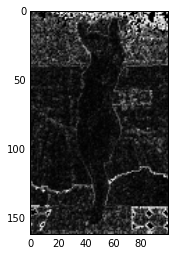

In [308]:
plt.imshow(hsv_grad_mag[:,:,1],cmap='Greys_r')

In [242]:
'hello_%.2i' % 6

'hello_06'

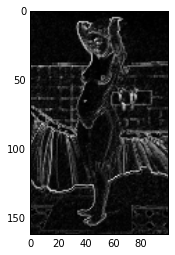

In [265]:
plt.imshow(hsv_grad_mag[:,:,2],cmap='Greys_r')